In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img(name, img):
    print(name + ':')
    if img.ndim == 3:  # 如果图像是彩色的
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')  # 不显示坐标轴
    plt.show()

In [3]:
img = cv2.imread('./files/j.png', 0)
kernel = nnbvcxsaq  1.erode(img, kernel, iterations=1)

img:


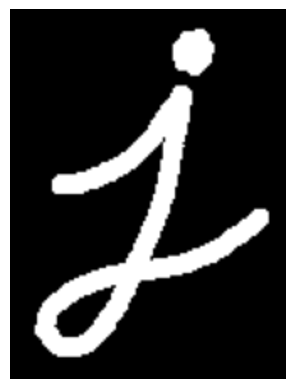

erosion:


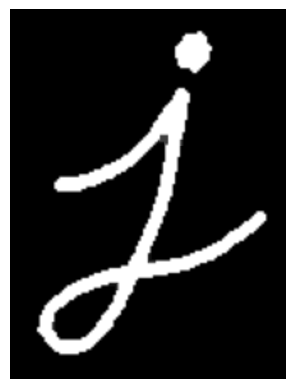

In [4]:
show_img("img", img)
show_img("erosion", erosion)

result:


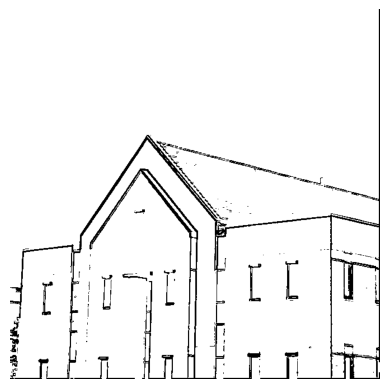

In [5]:
image = cv2.imread("./files/house.png", 0)
#构造一个3×3的结构元素 
element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilate = cv2.dilate(image, element)
erode = cv2.erode(image, element)

#将两幅图像相减获得边，第一个参数是膨胀后的图像，第二个参数是腐蚀后的图像
result = cv2.absdiff(dilate, erode)

#上面得到的结果是灰度图，将其二值化以便更清楚的观察结果
retval, result = cv2.threshold(result, 40, 255, cv2.THRESH_BINARY)
#反色，即对二值图每个像素取反
result = cv2.bitwise_not(result)
#显示图像
show_img("result", result);

In [17]:
cap = cv2.VideoCapture(0)

while (1):
    ret, frame = cap.read()
    
    # 高斯模糊
    # blurred = cv2.GaussianBlur(frame, (15, 15), 0)
    
    # 转换到HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([100, 120, 70])
    upper_blue = np.array([140, 255, 255])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # 使用形态学膨胀和腐蚀操作
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=2)
    
    # 找轮廓
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        # 滤除小轮廓
        if cv2.contourArea(contour) < 300:
            continue
        
        # 获取轮廓的几何特性
        M = cv2.moments(contour)
        
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            
            cv2.circle(frame, (cX, cY), 7, (255, 255, 255), -1)
            
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()
cap.release()
